In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

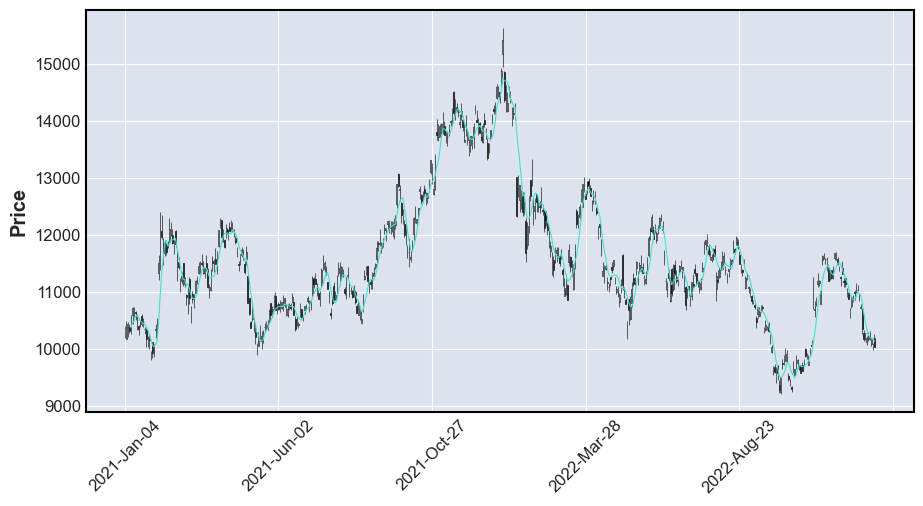

In [4]:
import mplfinance as mpf
import datetime as dt

#df = get_stock_data(7616)  # 7616 コロワイド
#cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]

# データの取得
df = pdr.DataReader("6758.JP", "stooq").sort_index()
# 日付範囲の選択（2021年1月1日から2022年12月31日まで）
cdf= df[dt.datetime(2021,1,1):dt.datetime(2022,12,31)]

# 終値を使う
close_prices = cdf["Close"]
mpf.plot(cdf, type="candle", mav=(5), figratio=(2,1))

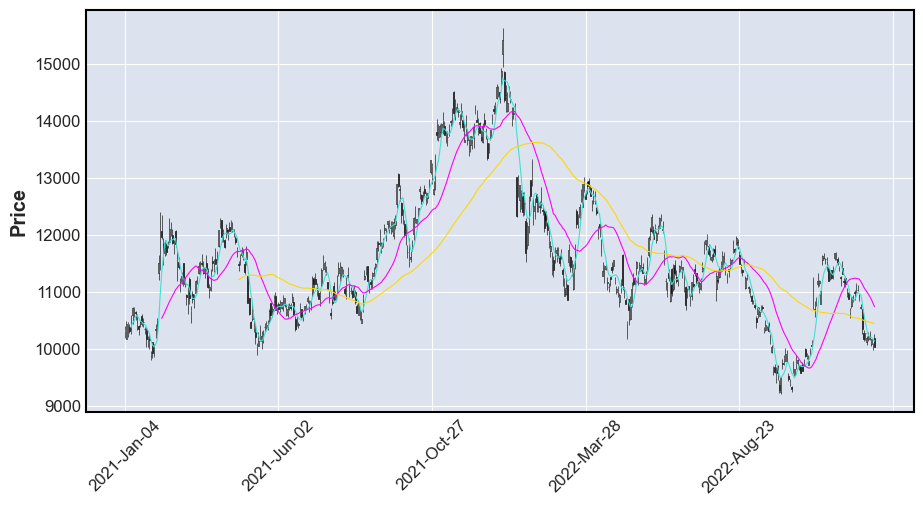

In [5]:
mpf.plot(cdf, type="candle", mav=(5, 25, 75), figratio=(2,1))

<ipython-input-6-ebc8345a1c9a>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


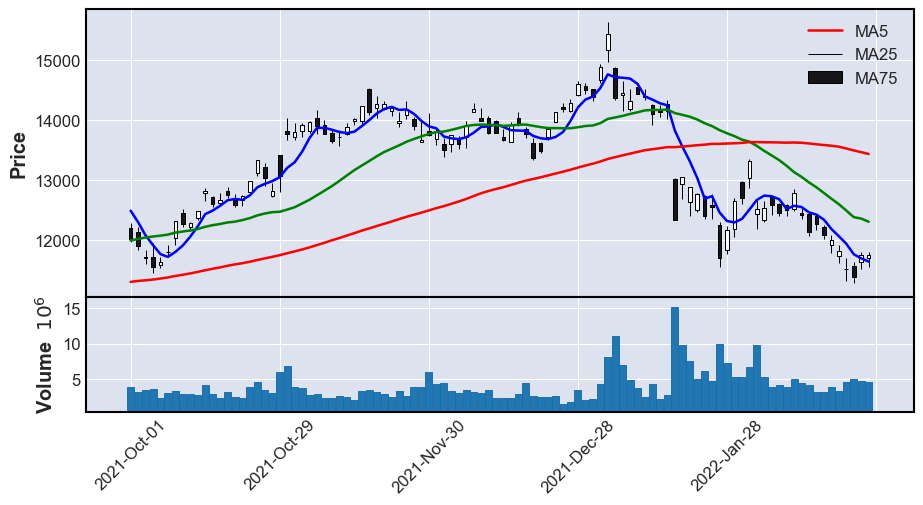

In [6]:
df["ma5"]   = df["Close"].rolling(window=5).mean()
df["ma25"]  = df["Close"].rolling(window=25).mean()
df["ma75"]  = df["Close"].rolling(window=75).mean()

cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,2,28)]

apd = { "MA5": mpf.make_addplot(cdf["ma5"], color="blue"),
         "MA25": mpf.make_addplot(cdf["ma25"], color="green"),
         "MA75": mpf.make_addplot(cdf["ma75"], color="red") }

 # 描画情報を取得
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True, volume=True)
# ラベルを追加 
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))

# チャートを表示
fig.show()